Total number of users: 250
Total number of items: 5

Ratings per product:
item_id
movie1    247
movie2    247
movie3    247
movie4    248
movie5    248
Name: rating, dtype: int64


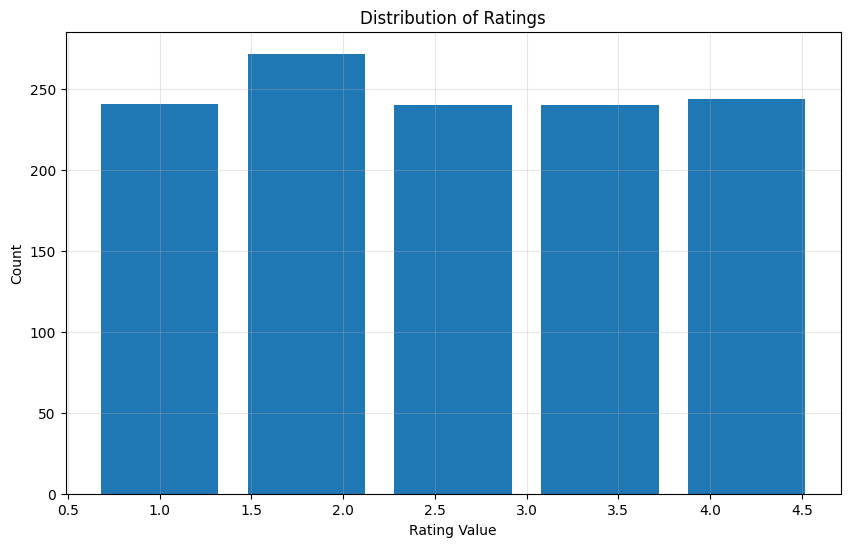


Sparsity of the matrix: 1.04%
Average rating: 2.98
Rating standard deviation: 1.41


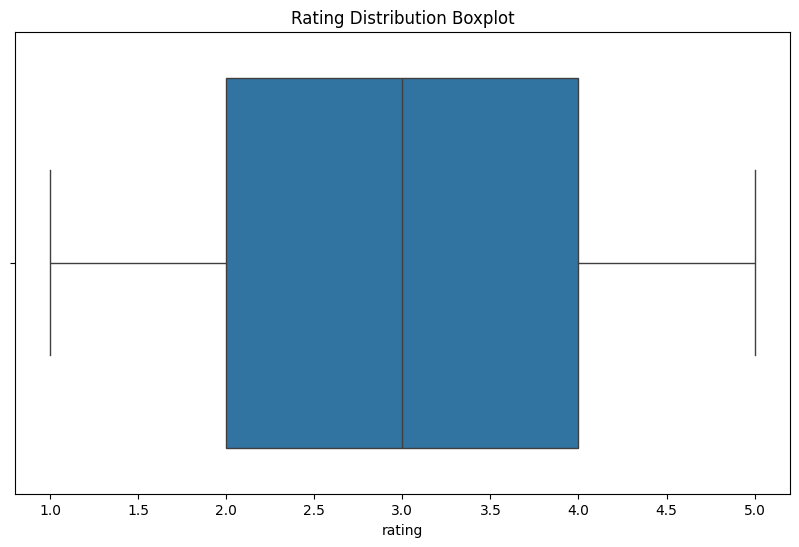


Two lowest rated items:
item_id
movie4    2.911290
movie2    2.951417
Name: rating, dtype: float64


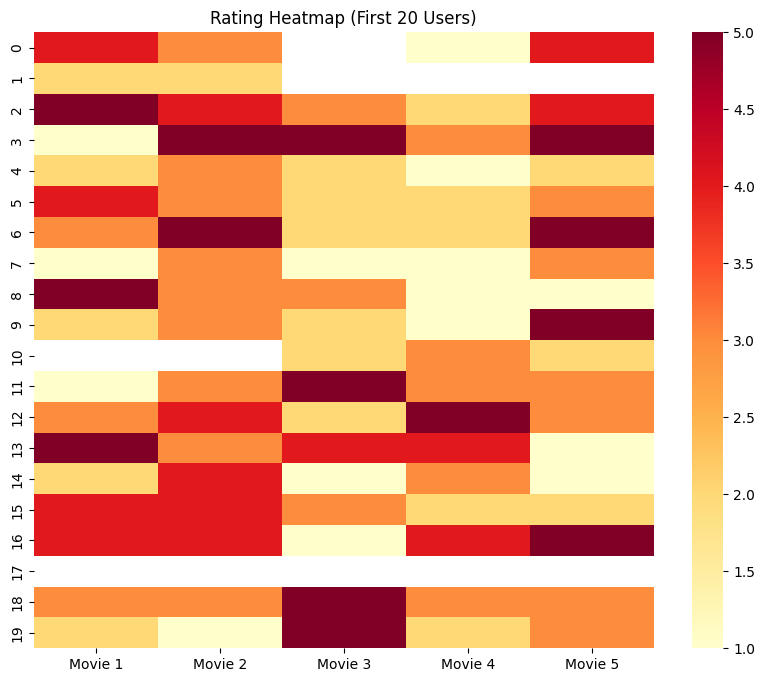


Results have been saved to 'assignment_results.pkl' and 'assignment_results.txt'


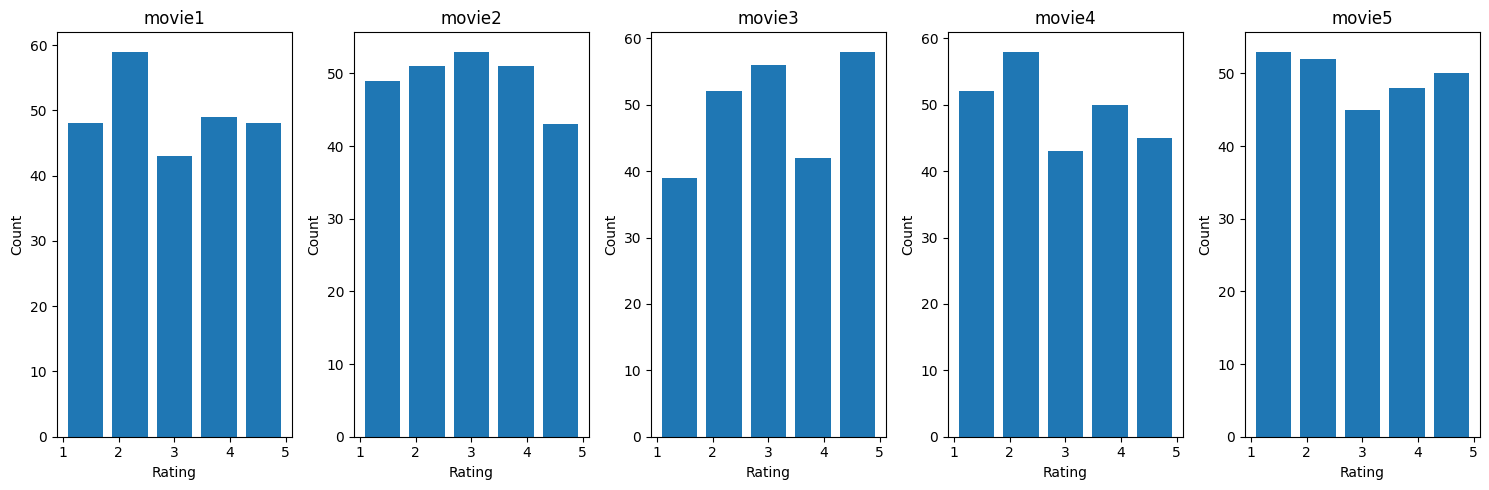

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

df = pd.read_csv('userMovie.csv')


df_melted = df.melt(id_vars=['userid'],
                    value_vars=['movie1', 'movie2', 'movie3', 'movie4', 'movie5'],
                    var_name='item_id',
                    value_name='rating')


Tnu = len(df['userid'].unique())
print(f"Total number of users: {Tnu}")


Tni = 5
print(f"Total number of items: {Tni}")


ratings_per_product = df_melted.groupby('item_id')['rating'].count()
print("\nRatings per product:")
print(ratings_per_product)


plt.figure(figsize=(10,6))
plt.hist(df_melted['rating'], bins=5, rwidth=0.8, align='left')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()


total_possible_ratings = Tnu * Tni
actual_ratings = df_melted['rating'].count()
sparsity = 1 - (actual_ratings/total_possible_ratings)
print(f"\nSparsity of the matrix: {sparsity:.2%}")


average_rating = df_melted['rating'].mean()
rating_std = df_melted['rating'].std()
print(f"Average rating: {average_rating:.2f}")
print(f"Rating standard deviation: {rating_std:.2f}")


plt.figure(figsize=(10,6))
sns.boxplot(x=df_melted['rating'])
plt.title('Rating Distribution Boxplot')
plt.show()


average_item_ratings = df_melted.groupby('item_id')['rating'].mean()
lowest_rated = average_item_ratings.nsmallest(2)
i1, i2 = lowest_rated.index
print("\nTwo lowest rated items:")
print(lowest_rated)


plt.figure(figsize=(10,8))
rating_matrix = df.iloc[:, 1:].values
sns.heatmap(rating_matrix[:20], cmap='YlOrRd',
            xticklabels=['Movie 1', 'Movie 2', 'Movie 3', 'Movie 4', 'Movie 5'])
plt.title('Rating Heatmap (First 20 Users)')
plt.show()


results = {
    'Tnu': Tnu,
    'Tni': Tni,
    'ratings_per_product': ratings_per_product,
    'sparsity': sparsity,
    'average_rating': average_rating,
    'rating_std': rating_std,
    'target_items': [i1, i2],
    'lowest_rated_items_avg': lowest_rated
}


with open('assignment_results.pkl', 'wb') as f:
    pickle.dump(results, f)


with open('assignment_results.txt', 'w') as f:
    f.write(f"Total number of users (Tnu): {Tnu}\n")
    f.write(f"Total number of items (Tni): {Tni}\n")
    f.write(f"Sparsity: {sparsity:.2%}\n")
    f.write(f"Average rating: {average_rating:.2f}\n")
    f.write(f"Rating standard deviation: {rating_std:.2f}\n")
    f.write(f"Target items (lowest rated): {[i1, i2]}\n")
    f.write("\nRatings per movie:\n")
    f.write(ratings_per_product.to_string())
    f.write("\n\nAverage ratings per movie:\n")
    f.write(average_item_ratings.to_string())

print("\nResults have been saved to 'assignment_results.pkl' and 'assignment_results.txt'")

plt.figure(figsize=(15,5))
for i, movie in enumerate(['movie1', 'movie2', 'movie3', 'movie4', 'movie5'], 1):
    plt.subplot(1,5,i)
    plt.hist(df[movie], bins=5, rwidth=0.8)
    plt.title(f'{movie}')
    plt.xlabel('Rating')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

Average ratings for target items:
movie4: 2.91
movie2: 2.95

Average rating for each item:
movie1    2.959514
movie2    2.951417
movie3    3.113360
movie4    2.911290
movie5    2.959677
dtype: float64

Covariance Matrix:
          movie1    movie2    movie3    movie4    movie5
movie1  1.974278  0.026161  0.048766  0.093150  0.102947
movie2  0.026161  1.885209 -0.211815 -0.016002  0.142781
movie3  0.048766 -0.211815  1.922996 -0.103345 -0.039169
movie4  0.093150 -0.016002 -0.103345  1.984130 -0.031675
movie5  0.102947  0.142781 -0.039169 -0.031675  2.054606



Top 5 peers:
movie4: ['movie3', 'movie1', 'movie5', 'movie2']
movie2: ['movie3', 'movie5', 'movie1', 'movie4']

Top 10 peers:
movie4: ['movie3', 'movie1', 'movie5', 'movie2']
movie2: ['movie3', 'movie5', 'movie1', 'movie4']

Prediction Comparison:

Target Item movie4:
5-peer prediction average: -0.00
10-peer prediction average: -0.00

Target Item movie2:
5-peer prediction average: -0.00
10-peer prediction average: -0.00


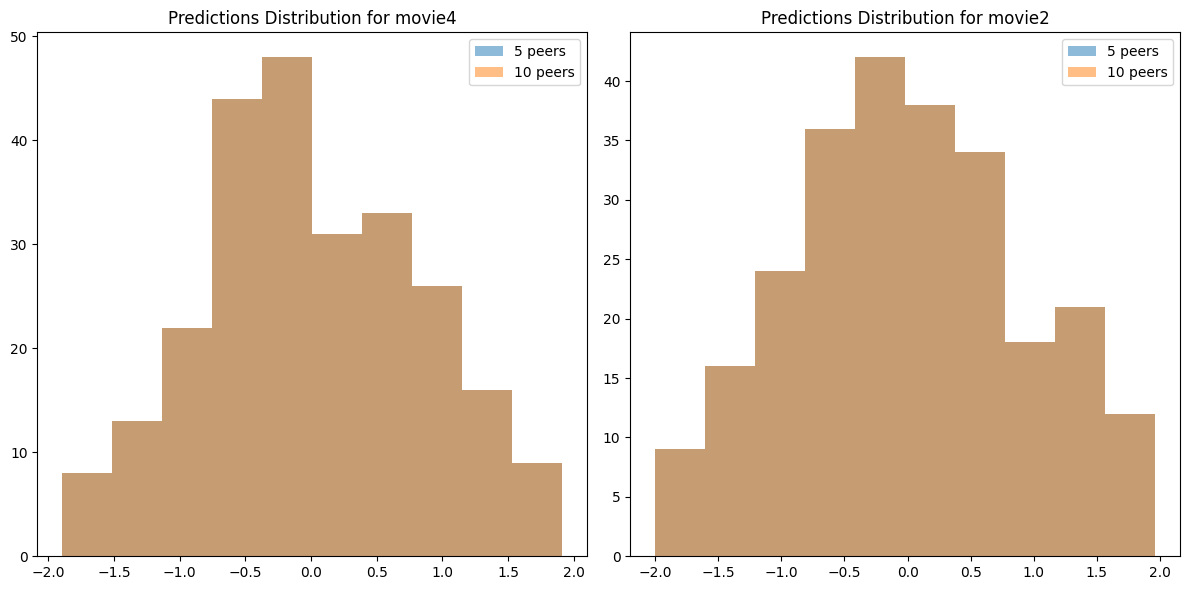

In [4]:



def pca_mean_filling_analysis(df):

    rating_matrix = df.iloc[:, 1:].values


    target_means = {
        i1: df[i1].mean(),
        i2: df[i2].mean()
    }
    print(f"Average ratings for target items:")
    print(f"{i1}: {target_means[i1]:.2f}")
    print(f"{i2}: {target_means[i2]:.2f}")


    imputer = SimpleImputer(strategy='mean')
    df_filled = pd.DataFrame(imputer.fit_transform(df.iloc[:, 1:]),
                           columns=df.iloc[:, 1:].columns)


    item_means = df_filled.mean()
    print("\nAverage rating for each item:")
    print(item_means)


    centered_ratings = df_filled - item_means


    cov_matrix = centered_ratings.cov()
    print("\nCovariance Matrix:")
    print(cov_matrix)


    plt.figure(figsize=(10, 8))
    sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
    plt.title('Covariance Matrix Heatmap')
    plt.show()


    def get_top_peers(item, n_peers):
        cov_with_item = abs(cov_matrix[item])
        return cov_with_item.nlargest(n_peers + 1)[1:].index.tolist()

    top_5_peers = {
        i1: get_top_peers(i1, 5),
        i2: get_top_peers(i2, 5)
    }

    top_10_peers = {
        i1: get_top_peers(i1, 10),
        i2: get_top_peers(i2, 10)
    }

    print("\nTop 5 peers:")
    print(f"{i1}: {top_5_peers[i1]}")
    print(f"{i2}: {top_5_peers[i2]}")

    print("\nTop 10 peers:")
    print(f"{i1}: {top_10_peers[i1]}")
    print(f"{i2}: {top_10_peers[i2]}")


    def compute_predictions(target_item, peers, ratings):
        pca = PCA(n_components=len(peers))
        peer_ratings = ratings[peers]


        peer_ratings_clean = peer_ratings.fillna(peer_ratings.mean())

        pca.fit(peer_ratings_clean)


        transformed_data = pca.transform(peer_ratings_clean)


        reconstructed = pca.inverse_transform(transformed_data)


        weights = np.abs(cov_matrix.loc[target_item, peers])
        weights = weights / weights.sum()

        predictions = np.dot(reconstructed, weights)
        return predictions


    predictions_5_peers = {
        i1: compute_predictions(i1, top_5_peers[i1], centered_ratings),
        i2: compute_predictions(i2, top_5_peers[i2], centered_ratings)
    }


    predictions_10_peers = {
        i1: compute_predictions(i1, top_10_peers[i1], centered_ratings),
        i2: compute_predictions(i2, top_10_peers[i2], centered_ratings)
    }


    print("\nPrediction Comparison:")
    print(f"\nTarget Item {i1}:")
    print(f"5-peer prediction average: {predictions_5_peers[i1].mean():.2f}")
    print(f"10-peer prediction average: {predictions_10_peers[i1].mean():.2f}")

    print(f"\nTarget Item {i2}:")
    print(f"5-peer prediction average: {predictions_5_peers[i2].mean():.2f}")
    print(f"10-peer prediction average: {predictions_10_peers[i2].mean():.2f}")


    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(predictions_5_peers[i1], alpha=0.5, label='5 peers')
    plt.hist(predictions_10_peers[i1], alpha=0.5, label='10 peers')
    plt.title(f'Predictions Distribution for {i1}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(predictions_5_peers[i2], alpha=0.5, label='5 peers')
    plt.hist(predictions_10_peers[i2], alpha=0.5, label='10 peers')
    plt.title(f'Predictions Distribution for {i2}')
    plt.legend()

    plt.tight_layout()
    plt.show()


    results = {
        'target_means': target_means,
        'item_means': item_means,
        'covariance_matrix': cov_matrix,
        'top_5_peers': top_5_peers,
        'top_10_peers': top_10_peers,
        'predictions_5_peers': predictions_5_peers,
        'predictions_10_peers': predictions_10_peers
    }

    return results


results = pca_mean_filling_analysis(df)


with open('part1_results.txt', 'w') as f:
    f.write("PCA Analysis Results\n\n")
    f.write("Target Items Mean Ratings:\n")
    for item, mean in results['target_means'].items():
        f.write(f"{item}: {mean:.2f}\n")

    f.write("\nItem Means:\n")
    f.write(results['item_means'].to_string())

    f.write("\n\nTop 5 Peers:\n")
    for item, peers in results['top_5_peers'].items():
        f.write(f"{item}: {peers}\n")

    f.write("\nTop 10 Peers:\n")
    for item, peers in results['top_10_peers'].items():
        f.write(f"{item}: {peers}\n")